In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [7]:
MLR = pd.read_csv('MLR.csv')
MLR = MLR[['Adjusted_R2']]
MLR = MLR.rename(columns={'Adjusted_R2':'MLR ADJR2'})
MLR

,MLR ADJR2
0,0.901866
1,0.847057
2,0.855613
3,0.819230
4,0.912979
5,0.859659
6,0.900490
7,0.912793
8,0.841981
9,0.914563


In [17]:
Ridge = pd.read_csv('Ridge.csv')
Ridge = Ridge[['Adjusted_R2']]
Ridge = Ridge.rename(columns={'Adjusted_R2':'Ridge ADJR2'})
Ridge

,Ridge ADJR2
0,0.880817
1,0.851402
2,0.916906
3,0.908772
4,0.920774
5,0.843265
6,0.911726
7,0.914105
8,0.892756
9,0.913071


In [18]:
RA = pd.read_csv('Ridge(Alpha).csv')
RA = RA[['Adjusted_R2']]
RA = RA.rename(columns={'Adjusted_R2':'Ridge(Alpha) ADJR2'})
RA

,Ridge(Alpha) ADJR2
0,0.900614
1,0.863245
2,0.905601
3,0.916594
4,0.906759
5,0.909749
6,0.903624
7,0.907183
8,0.923955
9,0.811461


In [24]:
L = pd.read_csv('Lasso.csv')
L = L[['Adjusted_R2']]
L = L.rename(columns={'Adjusted_R2':'Lasso ADJR2'})
L

,Lasso ADJR2
0,0.919484
1,0.897063
2,0.891598
3,0.906207
4,0.903464
5,0.828999
6,0.892974
7,0.869773
8,0.898418
9,0.766332


In [30]:
LA = pd.read_csv('Lasso(Alpha).csv')
LA = LA[['Adjusted_R2']]
LA = LA.rename(columns={'Adjusted_R2':'Lasso(Alpha) ADJR2'})
LA

,Lasso(Alpha) ADJR2
0,0.913062
1,0.910021
2,0.854004
3,0.904483
4,0.915091
5,0.890018
6,0.855354
7,0.903895
8,0.866618
9,0.913943


In [36]:
EN = pd.read_csv('ElasticNet(Alpha=1).csv')
EN = EN[['Adjusted_R2']]
EN = EN.rename(columns={'Adjusted_R2':'ElasticNet(Alpha=1) ADJR2'})
EN

,ElasticNet(Alpha=1) ADJR2
0,0.850105
1,0.830618
2,0.846945
3,0.899633
4,0.893127
5,0.882985
6,0.846220
7,0.871957
8,0.889975
9,0.842927


In [42]:
RF_NO_BS = pd.read_csv('RF_No_BS.csv')
RF_NO_BS = RF_NO_BS[['Adjusted_R2']]
RF_NO_BS = RF_NO_BS.rename(columns={'Adjusted_R2':'RF (NO BS) ADJR2'})
RF_NO_BS

,RF (NO BS) ADJR2
0,0.781061
1,0.800777
2,0.777390
3,0.786943
4,0.723818
5,0.773445
6,0.776195
7,0.765041
8,0.762856
9,0.795048


In [48]:
RF_W_BS = pd.read_csv('RF_W_BS.csv')
RF_W_BS = RF_W_BS[['Adjusted_R2']]
RF_W_BS = RF_W_BS.rename(columns={'Adjusted_R2':'RF (W BS) ADJR2'})
RF_W_BS

,RF (W BS) ADJR2
0,0.860852
1,0.891430
2,0.900160
3,0.903610
4,0.887190
5,0.882931
6,0.874757
7,0.924335
8,0.893855
9,0.845859


In [54]:
GB = pd.read_csv('GB.csv')
GB = GB[['Adjusted_R2']]
GB = GB.rename(columns={'Adjusted_R2':'GB ADJR2'})
GB

,GB ADJR2
0,0.843761
1,0.911138
2,0.912310
3,0.910726
4,0.829414
5,0.908505
6,0.914478
7,0.904663
8,0.831791
9,0.932156


In [60]:
XGB = pd.read_csv('XGB.csv')
XGB = XGB[['Adjusted_R2']]
XGB = XGB.rename(columns={'Adjusted_R2':'XGB ADJR2'})
XGB

,XGB ADJR2
0,0.901190
1,0.898167
2,0.909549
3,0.868502
4,0.896526
5,0.912025
6,0.882498
7,0.895246
8,0.915986
9,0.899488


In [67]:
R_GB = pd.read_csv('R+GB.csv')
R_GB = R_GB[['Adjusted_R2']]
R_GB = R_GB.rename(columns={'Adjusted_R2':'R+GB ADJR2'})
R_GB

,R+GB ADJR2
0,0.949963
1,0.952049
2,0.954159
3,0.904557
4,0.950233
5,0.898629
6,0.946627
7,0.947769
8,0.940110
9,0.934249


In [74]:
R_XGB = pd.read_csv('R+XGB.csv')
R_XGB = R_XGB[['Adjusted_R2']]
R_XGB = R_XGB.rename(columns={'Adjusted_R2':'R+XGB ADJR2'})
R_XGB

,R+XGB ADJR2
0,0.905353
1,0.938633
2,0.946317
3,0.916119
4,0.937129
5,0.901660
6,0.940368
7,0.939375
8,0.932560
9,0.946554


In [80]:
L_GB = pd.read_csv('L+GB.csv')
L_GB = L_GB[['Adjusted_R2']]
L_GB = L_GB.rename(columns={'Adjusted_R2':'L+GB ADJR2'})
L_GB

,L+GB ADJR2
0,0.932095
1,0.892760
2,0.928115
3,0.945932
4,0.949438
5,0.948309
6,0.950815
7,0.904055
8,0.911174
9,0.946038


In [88]:
L_XGB = pd.read_csv('L+XGB.csv')
L_XGB = L_XGB[['Adjusted_R2']]
L_XGB = L_XGB.rename(columns={'Adjusted_R2':'L+XGB ADJR2'})
L_XGB

,L+XGB ADJR2
0,0.872605
1,0.911117
2,0.908026
3,0.946164
4,0.922410
5,0.898901
6,0.946606
7,0.934461
8,0.933096
9,0.943975


In [94]:
E_GB = pd.read_csv('E+GB.csv')
E_GB = E_GB[['Adjusted_R2']]
E_GB = E_GB.rename(columns={'Adjusted_R2':'E+GB ADJR2'})
E_GB

,E+GB ADJR2
0,0.928558
1,0.944640
2,0.936058
3,0.903541
4,0.920112
5,0.874503
6,0.941023
7,0.928902
8,0.860476
9,0.941353


In [100]:
E_XGB = pd.read_csv('E+XGB.csv')
E_XGB = E_XGB[['Adjusted_R2']]
E_XGB = E_XGB.rename(columns={'Adjusted_R2':'E+XGB ADJR2'})
E_XGB

,E+XGB ADJR2
0,0.893701
1,0.874642
2,0.945477
3,0.932748
4,0.894917
5,0.884896
6,0.935199
7,0.943646
8,0.938687
9,0.946407


In [101]:
ADJR2 = pd.concat([MLR, Ridge, RA, L, LA, EN, 
                   RF_NO_BS, RF_W_BS, GB, XGB,
                   R_GB, R_XGB, L_GB, L_XGB, E_GB, E_XGB], axis=1)
ADJR2

,MLR ADJR2,Ridge ADJR2,Ridge(Alpha) ADJR2,Lasso ADJR2,Lasso(Alpha) ADJR2,ElasticNet(Alpha=1) ADJR2,RF (NO BS) ADJR2,RF (W BS) ADJR2,GB ADJR2,XGB ADJR2,R+GB ADJR2,R+XGB ADJR2,L+GB ADJR2,L+XGB ADJR2,E+GB ADJR2,E+XGB ADJR2
0,0.901866,0.880817,0.900614,0.919484,0.913062,0.850105,0.781061,0.860852,0.843761,0.901190,0.949963,0.905353,0.932095,0.872605,0.928558,0.893701
1,0.847057,0.851402,0.863245,0.897063,0.910021,0.830618,0.800777,0.891430,0.911138,0.898167,0.952049,0.938633,0.892760,0.911117,0.944640,0.874642
2,0.855613,0.916906,0.905601,0.891598,0.854004,0.846945,0.777390,0.900160,0.912310,0.909549,0.954159,0.946317,0.928115,0.908026,0.936058,0.945477
3,0.819230,0.908772,0.916594,0.906207,0.904483,0.899633,0.786943,0.903610,0.910726,0.868502,0.904557,0.916119,0.945932,0.946164,0.903541,0.932748
4,0.912979,0.920774,0.906759,0.903464,0.915091,0.893127,0.723818,0.887190,0.829414,0.896526,0.950233,0.937129,0.949438,0.922410,0.920112,0.894917
5,0.859659,0.843265,0.909749,0.828999,0.890018,0.882985,0.773445,0.882931,0.908505,0.912025,0.898629,0.901660,0.948309,0.898901,0.874503,0.884896
6,0.900490,0.911726,0.903624,0.892974,0.855354,0.846220,0.776195,0.874757,0.914478,0.882498,0.946627,0.940368,0.950815,0.946606,0.941023,0.935199
7,0.912793,0.914105,0.907183,0.869773,0.903895,0.871957,0.765041,0.924335,0.904663,0.895246,0.947769,0.939375,0.904055,0.934461,0.928902,0.943646
8,0.841981,0.892756,0.923955,0.898418,0.866618,0.889975,0.762856,0.893855,0.831791,0.915986,0.940110,0.932560,0.911174,0.933096,0.860476,0.938687
9,0.914563,0.913071,0.811461,0.766332,0.913943,0.842927,0.795048,0.845859,0.932156,0.899488,0.934249,0.946554,0.946038,0.943975,0.941353,0.946407


In [102]:
meds = ADJR2.median()
meds

MLR ADJR2                    0.896515
Ridge ADJR2                  0.905883
Ridge(Alpha) ADJR2           0.895983
Lasso ADJR2                  0.890147
Lasso(Alpha) ADJR2           0.900982
ElasticNet(Alpha=1) ADJR2    0.876929
RF (NO BS) ADJR2             0.781273
RF (W BS) ADJR2              0.885032
GB ADJR2                     0.909514
XGB ADJR2                    0.897266
R+GB ADJR2                   0.941443
R+XGB ADJR2                  0.938090
L+GB ADJR2                   0.939708
L+XGB ADJR2                  0.936078
E+GB ADJR2                   0.932678
E+XGB ADJR2                  0.926924
dtype: float64

In [103]:
meds.sort_values(ascending=False, inplace=True)
meds.index

Index(['R+GB ADJR2', 'L+GB ADJR2', 'R+XGB ADJR2', 'L+XGB ADJR2', 'E+GB ADJR2',
       'E+XGB ADJR2', 'GB ADJR2', 'Ridge ADJR2', 'Lasso(Alpha) ADJR2',
       'XGB ADJR2', 'MLR ADJR2', 'Ridge(Alpha) ADJR2', 'Lasso ADJR2',
       'RF (W BS) ADJR2', 'ElasticNet(Alpha=1) ADJR2', 'RF (NO BS) ADJR2'],
      dtype='object')

In [104]:
ADJR2 = ADJR2[meds.index]

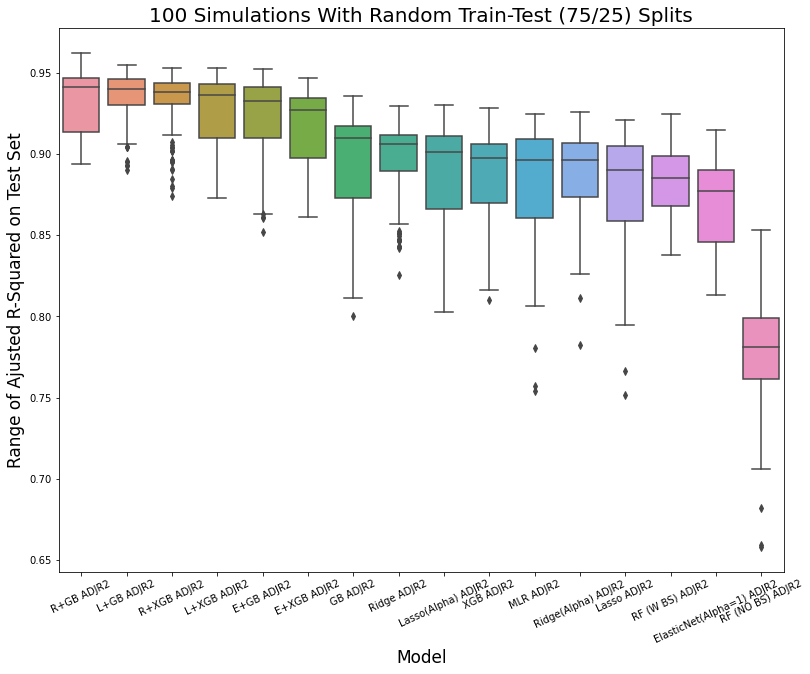

In [105]:
plt.figure(figsize=(13,10))
plt.title('100 Simulations With Random Train-Test (75/25) Splits', fontsize=20)
plt.ylabel('Range of Ajusted R-Squared on Test Set', fontsize=17)
plt.xlabel('Model', fontsize=17)
sns.boxplot(data=ADJR2)
plt.xticks(rotation=25);